In [3]:
using Random, Statistics, PyPlot, Polynomials

In [4]:
using JLD # to save to file

In [7]:
data = load("./tmp/auto_sweeps_100000_36.jld")

Dict{String, Any} with 7 entries:
  "configs_vec" => [5.66949 5.72385 … 5.88927 5.66185; 1.13101 5.93282 … 1.3548…
  "N"           => 36
  "Ts"          => [0.1, 0.4, 0.5, 0.6, 0.9, 0.95, 1.0, 1.1, 1.15, 1.2, 1.3, 1.…
  "Ens"         => [-40.0235 22.3224 … 18.9903 -15.3723; -92.4357 17.7938 … 17.…
  "mys"         => [0.00316826 -0.0241369 … 0.0216544 0.0160146; -0.00332927 -0…
  "mxs"         => [-0.00618714 0.0166878 … 0.0367079 -0.0202988; -0.0425292 0.…
  "Ns"          => 100000

In [47]:
function CalculateError(m, Neq, Nsw)
    err = Float64[]
    Nsw2 = 2^Int(floor(log(2, Nsw-Neq))) # closest power of 2 smaller than number of sweeps after equilibration
    ml = m[end-Nsw2+1:end]
    min_size = 2^5
    while length(ml) > min_size
        push!(err, std(ml)/sqrt(length(ml)-1))
        ml = map(j -> mean(ml[2*j-1:2*j]), range(1,stop=div(length(ml),2)) )
    end
    return err
end



CalculateError (generic function with 1 method)

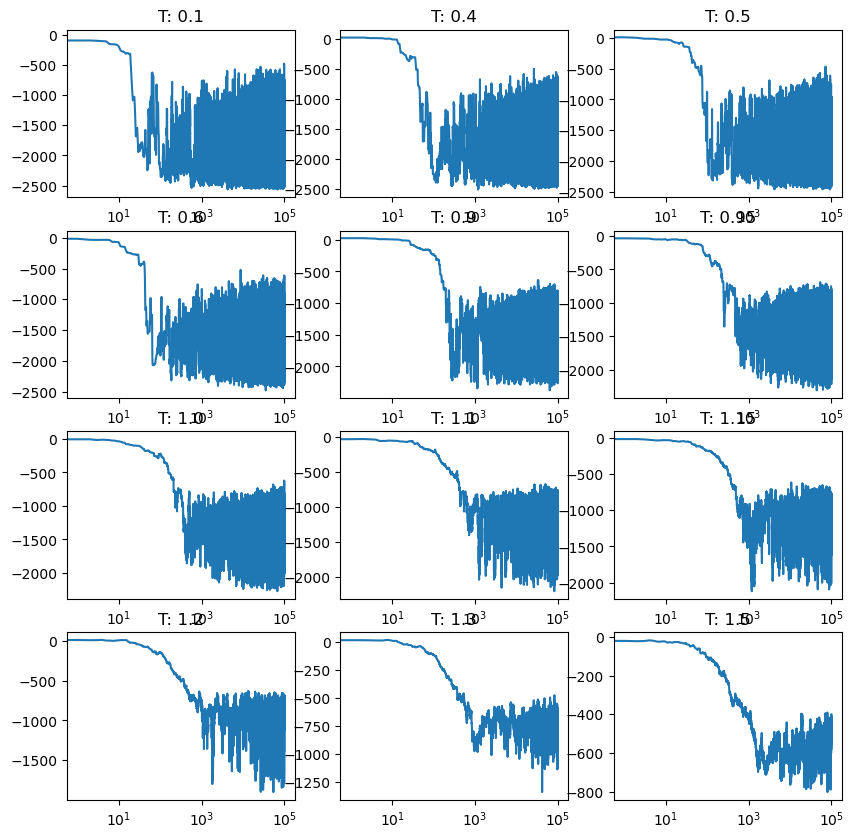

In [45]:
fig = figure(figsize=(10,10))
for (i,T) in enumerate(Ts)
    ax = fig.add_subplot(ceil(Int,length(Ts)/3),3,i)
    ax.set_title("T: $T")
    ax.plot(data["Ens"][:,i])
    xscale("log")
end
show()

Autocorrelation time for 0.1 : 0.0
Autocorrelation time for 0.4 : 1.0
Autocorrelation time for 0.5 : 1.0
Autocorrelation time for 0.6 : 0.0
Autocorrelation time for 0.9 : 2.0
Autocorrelation time for 0.95 : 1.0
Autocorrelation time for 1.0 : 2.0
Autocorrelation time for 1.1 : 4.0
Autocorrelation time for 1.15 : 7.0
Autocorrelation time for 1.2 : 11.0
Autocorrelation time for 1.3 : 36.0
Autocorrelation time for 1.5 : 

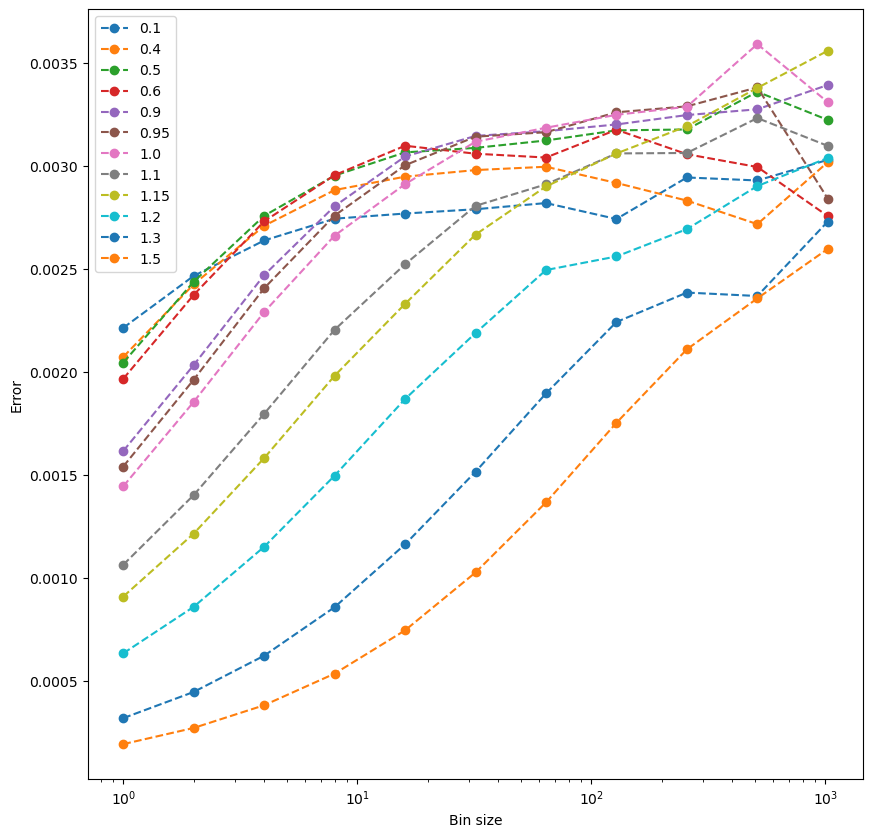

91.0


In [50]:
mxs = data["mxs"]
Ns = data["Ns"]
Neq_s = [50, 100, 100, 100,500,1000,1000,1000,1000,1000,1000,1000]
aut_cor_times = []
figure(figsize=(10,10))
for (i,T) in enumerate(Ts)
    err = CalculateError(mxs[:,i], Neq_s[i], Ns)
    plot(2 .^ range(0, length=length(err)), err, "--o",label="$T")
    auto_cor_time = round(((err[end]/err[1])^2-1)/2)
    println("Autocorrelation time for $T : ", auto_cor_time )
    append!(aut_cor_times,auto_cor_time)
end

ylabel("Error")
xlabel("Bin size")
xscale("log")
legend()

show()

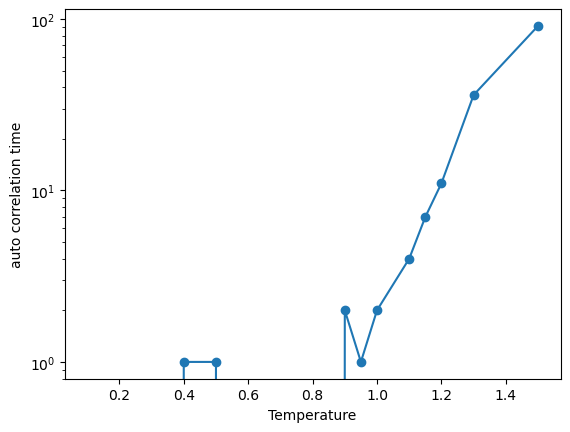

In [51]:
plot(Ts,aut_cor_times,"-o")
ylabel("auto correlation time")
xlabel("Temperature")
yscale("log")
show()

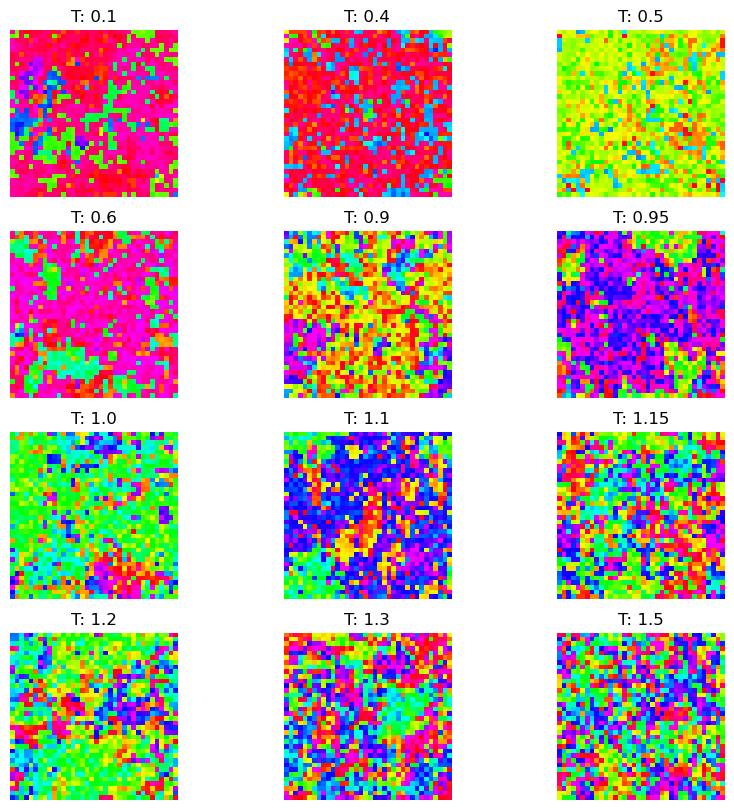

In [52]:
configs_vec = data["configs_vec"]
Ts = data["Ts"]
N = data["N"]
fig = figure(figsize=(10,10))

for (i,T) in enumerate(Ts)
    ax = fig.add_subplot(ceil(Int,length(Ts)/3),3,i)
    ax.imshow((reshape(configs_vec[i,:],(N,N))),cmap="hsv",origin="lower")
    ax.set_title("T: $T")
    ax.axis("off")
end
show()

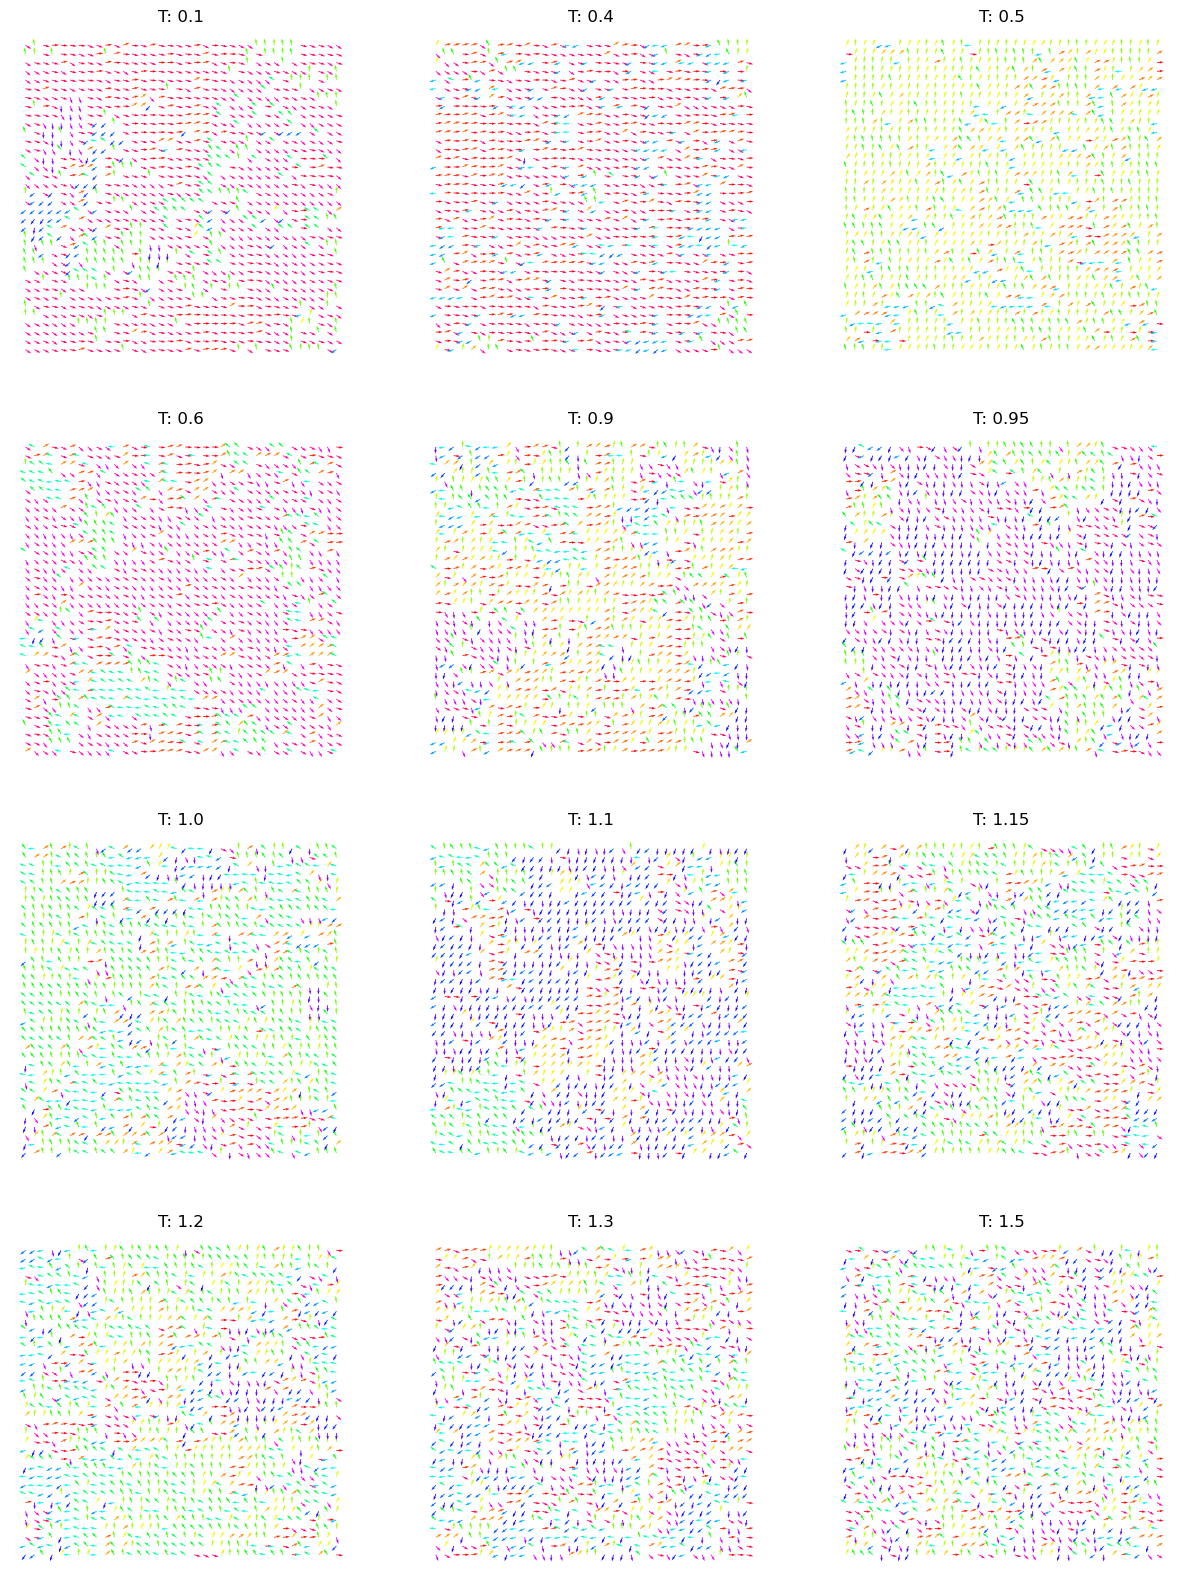

In [132]:
configs_vec = data["configs_vec"]
Ts = data["Ts"]
N = data["N"]
X = range(1,N, step=1);
Y = range(1, N, step=1);
fig = figure(figsize=(15,20))

for (i,T) in enumerate(Ts)
    ax = fig.add_subplot(ceil(Int,length(Ts)/3),3,i)
    conf = reshape(configs_vec[i,:],(N,N))
    U = map(x->cos(x),conf)
    V = map(x->sin(x),conf)
    ax.quiver(X,Y,U,V,conf,cmap="hsv",scale=50)
    ax.set_title("T: $T")
    ax.axis("off")
end
show()

In [77]:
function spin_spin_coorelation(configuration)
    configuration = reshape(configuration,(N,N))
    coorelations = zeros(Float64,N)
    for i in range(1,length=N)
        for j in range(1,length=N)
            coorelations[i] += cos(configuration[1,j]-configuration[i,j])
        end
        coorelations[i] = coorelations[i]/N
    end
    return coorelations
end

spin_spin_coorelation (generic function with 2 methods)

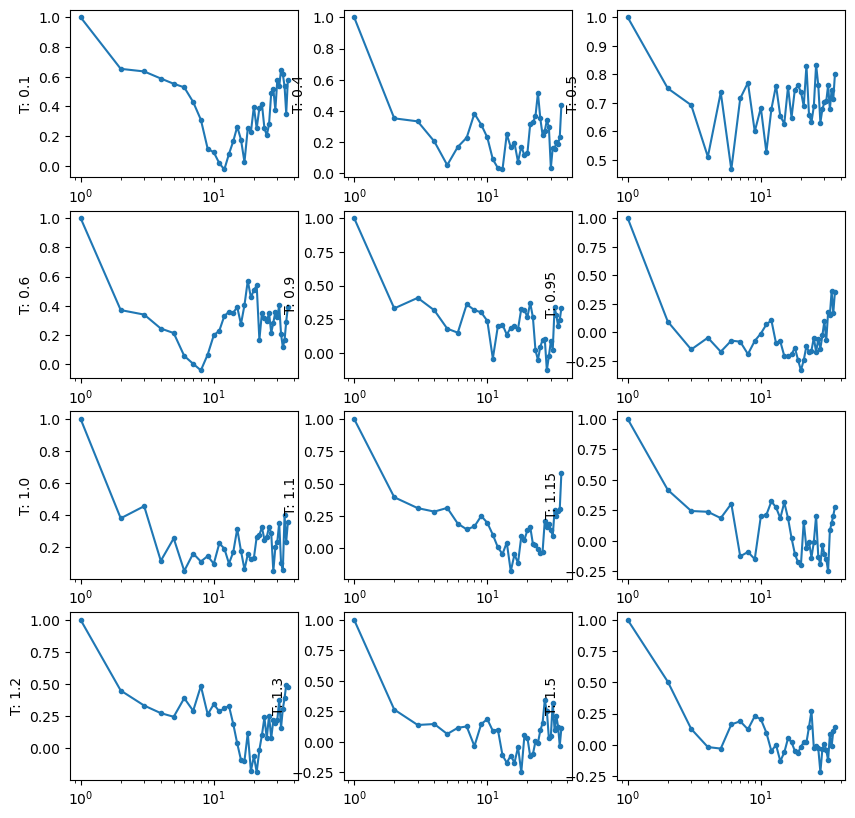

In [135]:
fig = figure(figsize=(10,10))

for (i,T) in enumerate(Ts)
    ax = fig.add_subplot(ceil(Int,length(Ts)/3),3,i)
    co = spin_spin_coorelation(configs_vec[i,:])
    ax.plot(range(1,length=N),co,".-",label="$T")
    ax.set_xscale("log")
    #ax.set_yscale("log")
    ax.set_ylabel("T: $T")
end

show()

In [136]:
function calculate_ρs()
    
end

calculate_ρs (generic function with 1 method)